In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np


In [2]:
# x = read_metrics("/home/sonofman/Research/Arxiv2Arxode/lib/eval/stats/cc_a2a_gpt4.json")
# X = pd.DataFrame(x)


def load_data_to_dataframe(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    # print(data)
    # exit()
    flattened_data = []
    for task in data:
        for attempt in task["attempt_results"]:
            for attempt_key, attempt_data in attempt.items():
                # print(attempt_data)
                # exit()
                if (
                    attempt_data.get("cc_metrics", {}).get(
                        "avg_cc_over_functions_within_attempt"
                    )
                    > 0  # if code is not executable then cyclomatic complexity is -1
                ):
                    cc_metrics = attempt_data.get("cc_metrics", {}).get(
                        "avg_cc_over_functions_within_attempt"
                    )
                else:
                    cc_metrics = None

                attempt_metrics = {
                    "task_desc": task["task_desc"],
                    "attempt_key": attempt_key,
                    "cyclomatic_complexity": cc_metrics,
                    **attempt_data.get("halstead_metrics"),
                }

                flattened_data.append(attempt_metrics)

    return pd.DataFrame(flattened_data)


# df = load_data_to_dataframe(
# "/home/sonofman/Research/Arxiv2Arxode/lib/eval/stats/cc_a2a_gpt4.json"
# )

# Now you can easily calculate the average cyclomatic complexity for each task
# average_cc_per_task = df.groupby("task_desc")["average_cc"].mean().reset_index()

# print(average_cc_per_task)

In [3]:
# x['cc']
# from radon.metrics import h_visit
# analyze_code_complexity("import numpy as np\nfrom sklearn.linear_model import LinearRegression\n\n# Generate random data\nnp.random.seed(0)\nn_samples = 100\nx = np.random.randn(n_samples)\ny = x * 3 + np.random.randn(n_samples)\n\n# Reshape data for sklearn\nx = x.reshape(-1, 1)\ny = y.reshape(-1, 1)\n\n# Use Linear Regression as the model\nmodel = LinearRegression()\nmodel.fit(x, y)\n\n# Empirical Risk Minimization\npredictions = model.predict(x)\nempirical_risk = np.average((y - predictions) ** 2)\n\nprint(\"Empirical Risk: \",empirical_risk)")
# h_visit("import numpy as np\nfrom sklearn.linear_model import LinearRegression\n\n# Generate random data\nnp.random.seed(0)\nn_samples = 100\nx = np.random.randn(n_samples)\ny = x * 3 + np.random.randn(n_samples)\n\n# Reshape data for sklearn\nx = x.reshape(-1, 1)\ny = y.reshape(-1, 1)\n\n# Use Linear Regression as the model\nmodel = LinearRegression()\nmodel.fit(x, y)\n\n# Empirical Risk Minimization\npredictions = model.predict(x)\nempirical_risk = np.average((y - predictions) ** 2)\n\nprint(\"Empirical Risk: \",empirical_risk)")
# exec("import numpy as np\nfrom sklearn.linear_model import LinearRegression\n\n# Generate random data\nnp.random.seed(0)\nn_samples = 100\nx = np.random.randn(n_samples)\ny = x * 3 + np.random.randn(n_samples)\n\n# Reshape data for sklearn\nx = x.reshape(-1, 1)\ny = y.reshape(-1, 1)\n\n# Use Linear Regression as the model\nmodel = LinearRegression()\nmodel.fit(x, y)\n\n# Empirical Risk Minimization\npredictions = model.predict(x)\nempirical_risk = np.average((y - predictions) ** 2)\n\nprint(\"Empirical Risk: \",empirical_risk)")

In [4]:
a2a_gpt4 = load_data_to_dataframe(
    "/home/sonofman/Research/Arxiv2Arxode/lib/eval/stats/code_complexity/cc_a2a_gpt4.json",
)
a2a_gpt3 = load_data_to_dataframe(
    "/home/sonofman/Research/Arxiv2Arxode/lib/eval/stats/code_complexity/cc_a2a_turbo.json",
)
base_gpt4 = load_data_to_dataframe(
    "/home/sonofman/Research/Arxiv2Arxode/lib/eval/stats/code_complexity/cc_baseGPT.json",
)
base_gpt3 = load_data_to_dataframe(
    "/home/sonofman/Research/Arxiv2Arxode/lib/eval/stats/code_complexity/cc_base_turbo.json",
)

# df_list = [a2a_gpt4, a2a_gpt3, base_gpt4, base_gpt3]
# for df in df_list:
#     df.dropna()

In [3]:
# a2a_gpt4['task_desc'].unique()
task_desc_order = [
    "Create a python file to help me understand why empirical risk minimization is NP hard.",
    "Implement the polyak stepsize for the gradient descent algorithm and implement for me in a novel use case to improve my understanding.",
    'Implement mirrored descent for me in a self-contained python file, so I can get a better understanding of it, additionally make it online so that it is "online mirrored descent".',
    'Show me a meaningul implementation of the "shampoo" optimization technique in Python, perhaps pull a model from hugging face to try out your Shampoo implementation on.',
    "Create a python file that implements the main ideas present in the REMEMBER paper, apply it with a minimal experiment on some dataset showing the experience memory technique being applied. Remember you also have access to source code embeddings as well related ot the research paper.",
    "Create a python file that highlights how exactly experience memory can be updated using a RL policy, recreate a minimal executable example for me, do not make any assumptions or fill any functions with the pass keyword or ellipses.",
    "Explore the paper that talks about enhancing an RL agents capabilities by way of interacting with an LLM, highlight the main ideas for me and if possible generate a python file with a minimal conceptual recreation that is executable and can produce meaningful output for me.",
    "Recreate the When2Ask Algorithm for me in a minimal executable python file, highlighting the main techniques the paper introduces. Use any libraries necessary to import language models and set up an environment for testing. Make no assumptions and ensure that the python file is executable and produces output.",
    "Show me an exmaple of an LLM posed as a planner according the Planner-Actor-Mediator framework. Make no assumptions and ensure that the python file is executable and produces output, do not put the pass keyword or ellipses in any function definitions",
    "Show me how an RL agents exploration can be guiding with LLM priors according to the paper. Create a minimal example in a self-contained python file that must be executable and produce an output, do not make any assumptions or fill any functions with the pass keyword or ellipses.",
]

In [5]:
colors = [
    "#001a3b",
    "#3266a8",
    "#ff1500",
    "#fc9b92",
]


colors2 = ["#EEEEEE", "#76ABAE", "#222831", "#31363F"]

colors3 = ["#78A083", "#50727B", "#344955", "#35374B"]

colors4 = ["#FDA403", "#E8751A", "#898121", "#E5C287"]


def plot_metric_comparison_boxplot(
    df_list, model_labels, metric="cyclomatic_complexity"
):
    metric_data = [df[metric] for df in df_list]

    means = [df[metric].mean() for df in df_list]  # Calculate mean for each model

    customized_labels = [
        f"{label}\nMean: {mean:.2f}" for label, mean in zip(model_labels, means)
    ]

    plt.figure(figsize=(10, 6))
    plt.boxplot(metric_data, labels=customized_labels)
    plt.ylabel(metric)
    plt.title(f"Comparison of {metric} across Models")
    # plt.xticks(rotation=45)
    plt.show()


def plot_metric_comparison_swarm(df_list, model_labels, metric="cyclomatic_complexity"):
    """Plots a comparison of a specified metric across different models."""

    # Create a new DataFrame for all models
    all_data = pd.DataFrame()

    for df, label in zip(df_list, model_labels):
        temp_df = df.copy()
        temp_df["model"] = label
        all_data = pd.concat([all_data, temp_df])

    plt.figure(figsize=(10, 6))
    sns.swarmplot(x="model", y=metric, data=all_data)
    plt.ylabel(metric)
    plt.title(f"Comparison of {metric} across Models")
    plt.show()


def plot_metric_comparison_hist(df_list, model_labels, metric="cyclomatic_complexity"):
    """Plots a comparison of a specified metric across different models."""

    plt.figure(figsize=(10, 6))

    for df, label in zip(df_list, model_labels):
        plt.hist(df[metric], bins=30, alpha=0.5, label=label)

    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {metric} across Models")
    plt.legend()
    plt.show()


def statistical_test(df1, df2, metric):
    stat, p = ttest_ind(df1[metric], df2[metric], nan_policy="omit")
    print(f"Statistics={stat}, p={p}")
    alpha = 0.05
    if p > alpha:
        print("Same distributions (fail to reject H0)")
    else:
        print("Different distributions (reject H0)")


def plot_metric_comparison_ridgeline(
    df_list, model_labels, metric="cyclomatic_complexity"
):
    """Plots a comparison of a specified metric across different models."""

    # Create a new DataFrame for all models
    all_data = pd.DataFrame()

    for df, label in zip(df_list, model_labels):
        temp_df = df.copy()
        temp_df["model"] = label
        all_data = pd.concat([all_data, temp_df])

    means = all_data.groupby("model")[metric].mean()

    plt.figure(figsize=(10, 6))
    for i, model in enumerate(model_labels):
        mean_metric = means[model]
        label_with_mean = f"{model} (mean {metric}: {mean_metric:.2f})"

        sns.kdeplot(
            data=all_data[all_data["model"] == model][metric],
            fill=True,
            label=label_with_mean,
            alpha=0.4,
            levels=40,
            color=colors[i],
            # bw_adjust=4,
            # multiple="stack",
        )

    plt.xlabel(metric.capitalize())
    plt.title(f"Ridgeline plot of {metric} across Models")
    plt.legend()
    plt.show()


def plot_metric_comparison_violin(df_list, model_labels, metric, scale="area"):
    all_data = pd.DataFrame()
    for df, label in zip(df_list, model_labels):
        temp_df = df.copy()
        temp_df["model"] = label
        all_data = pd.concat([all_data, temp_df])

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="model", y=metric, data=all_data, scale=scale)
    plt.ylabel(metric)
    plt.title(f"Comparison of {metric} across Models")
    plt.show()


def plot_metric_histogram_with_dynamic_binning(df, metric="cyclomatic_complexity"):
    data = df[metric]
    bins = int(np.sqrt(len(data)))
    plt.hist(data, bins=bins, alpha=0.7)
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {metric} with Dynamic Binning")
    plt.show()


def plot_stacked_bar_chart(df_list, model_labels, metric="cyclomatic_complexity"):
    combined_data = pd.DataFrame()
    for df, label in zip(df_list, model_labels):
        temp_df = df.copy()
        temp_df["model"] = label
        combined_data = pd.concat([combined_data, temp_df], ignore_index=True)
        print(df["task_desc"].tolist())

    agg_data = combined_data.groupby(["task_desc", "model"])[metric].mean().unstack()

    ax = agg_data.plot(
        kind="bar",
        stacked=True,
        figsize=(12, 6),
        colormap=mcolors.ListedColormap(colors),
    )
    # print(agg_data)

    # Corrected to match the number of x-ticks
    task_labels = [f"Task {i+1}" for i in range(len(agg_data.index))]
    ax.set_xticks(range(len(agg_data.index)))  # Ensure we have correct number of ticks
    ax.set_xticklabels(task_labels, rotation=45)

    plt.xlabel("Task")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} Comparison Across Models")
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

In [7]:
a2a_gpt4.groupby("task_desc")["volume"].mean()

task_desc
Create a python file that highlights how exactly experience memory can be updated using a RL policy, recreate a minimal executable example for me, do not make any assumptions or fill any functions with the pass keyword or ellipses.                                                                                    46.882687
Create a python file that implements the main ideas present in the REMEMBER paper, apply it with a minimal experiment on some dataset showing the experience memory technique being applied. Remember you also have access to source code embeddings as well related ot the research paper.                                92.635379
Create a python file to help me understand why empirical risk minimization is NP hard.                                                                                                                                                                                                                                     19.339850
Explore the pap

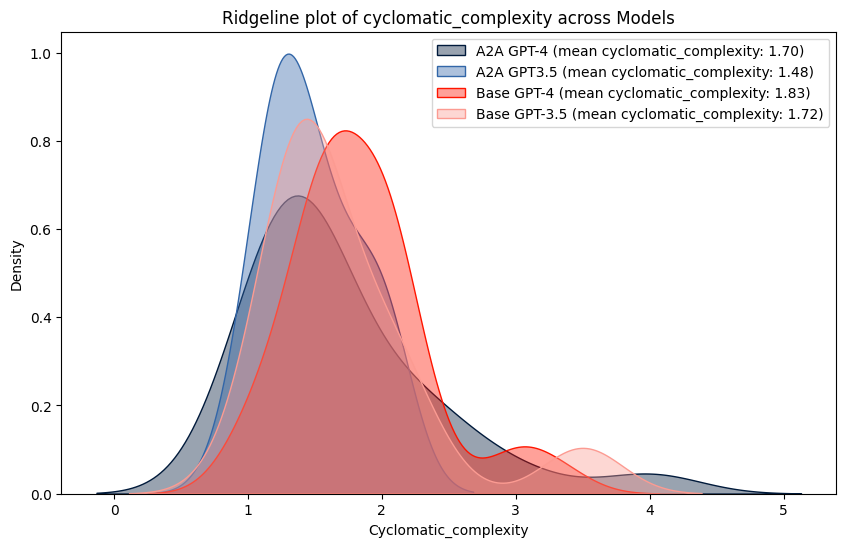

In [6]:
# plot_stacked_bar_chart(
#     df_list,
#     ["A2A GPT-4", "A2A GPT3.5", "Base GPT-4", "Base GPT-3.5"],
#     "cyclomatic_complexity",
# )
# plot_metric_histogram_with_dynamic_binning(a2a_gpt3)

plot_metric_comparison_ridgeline(
    [
        a2a_gpt4,
        a2a_gpt3,
        base_gpt4,
        base_gpt3,
    ],
    [
        "A2A GPT-4",
        "A2A GPT3.5",
        "Base GPT-4",
        "Base GPT-3.5",
    ],
    metric="cyclomatic_complexity",
    # scale="width",
)

# # Example statistical test between A2A GPT-4 and No FW GPT-3.5 for cyclomatic complexity
# statistical_test(a2a_gpt4, base_gpt4, "cyclomatic_complexity")

In [10]:
print(len(a2a_gpt3["time"].dropna()))
sum(a2a_gpt3["time"].dropna()) / len(a2a_gpt3["time"].dropna())

14


1.1723409828983662

In [11]:
a2a_gpt4["time"].mean(), a2a_gpt3["time"].mean(), base_gpt4[
    "time"
].mean(), base_gpt3["time"].mean()

(13.055369280930707, 1.1723409828983662, 10.107448970406057, 7.966606764591002)

In [12]:
# base_gpt4.groupby("task_desc")["cyclomatic_complexity"].mean().reset_index()
# a2a_gpt4.groupby("task_desc")["time"].mean().reset_index()["time"].mean()

{'Task_1': 80.0, 'Task_2': 60.0, 'Task_3': 0.0, 'Task_4': 0.0, 'Task_5': 0.0, 'Task_6': 20.0, 'Task_7': 80.0, 'Task_8': 0.0, 'Task_9': 100.0, 'Task_10': 0.0}


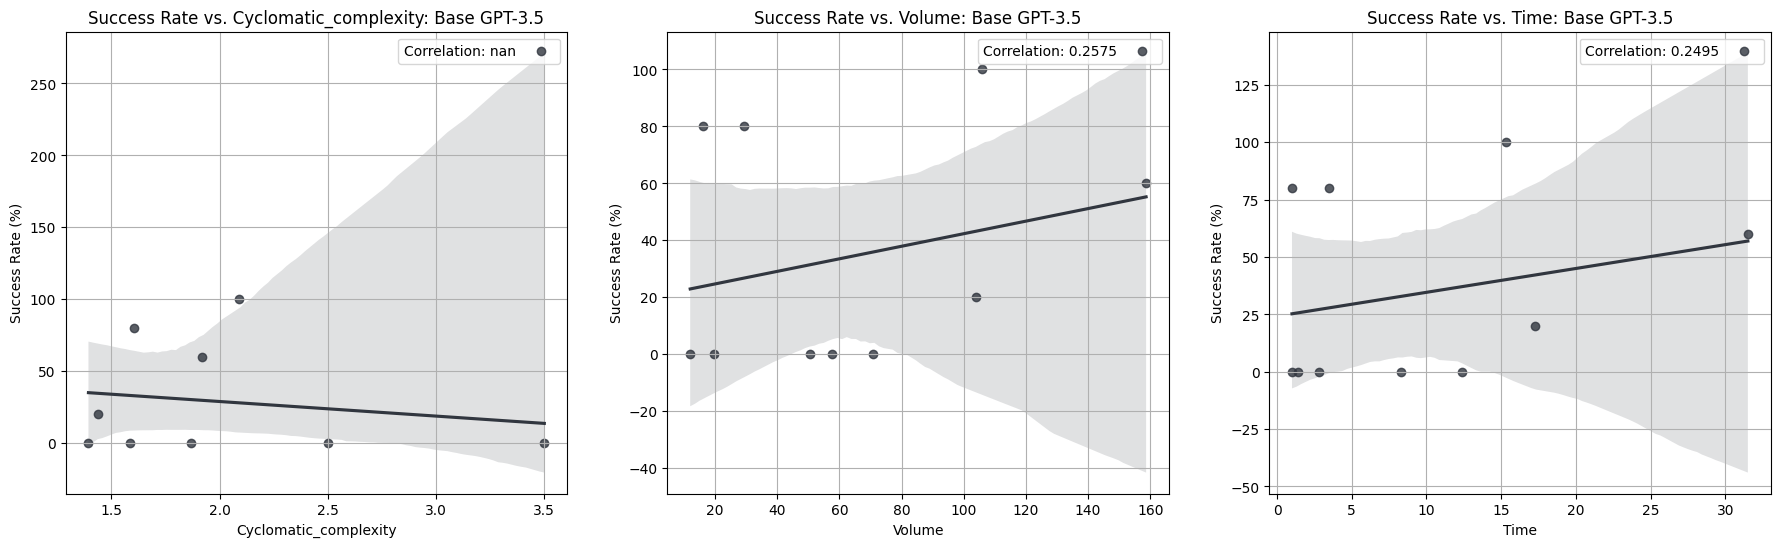

In [13]:
from analysis import calculate_success_rates_from_combined_stats

with open(
    "./stats/tasks_and_code_exe_results/combined_stats_baseGPT.jsonl", "r"
) as f:
    data = [json.loads(line) for line in f]
x = calculate_success_rates_from_combined_stats(data)
print(x)

numeric_cols = [
    "cyclomatic_complexity",
    "volume",
    # "vocabulary",
    # "difficulty",
    # "effort",
    "time",
]
metric = numeric_cols[0]
success_rates_list = []

for _, rate in x.items():
    success_rates_list.append(rate)
# print(success_rates_list)


# df_avg = base_gpt3.copy()
df_avg = base_gpt4.groupby("task_desc", as_index=False)[numeric_cols].mean()


df_avg = df_avg.set_index("task_desc").loc[task_desc_order].reset_index()

# it is important to assign the success rates list which is in the desired order of tasks, after the groupby operation and ordering operation above.
df_avg["success_rate"] = success_rates_list

# For models that have nan values, fill with 0 or mean of metric..., dropna is what was done for plots presented in the paper. A2AGPT4 has no NaNs.
# df_avg.fillna(0, inplace=True)
# df_avg.dropna(inplace=True)


plt.figure(figsize=(22, 6))
for i, metric in enumerate(numeric_cols):
    correlation = np.corrcoef(df_avg[metric], df_avg["success_rate"])
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=metric, y="success_rate", data=df_avg, color=colors2[3])
    plt.title(f"Success Rate vs. {metric.capitalize()}: Base GPT-3.5")
    plt.xlabel(f"{metric.capitalize()}")
    plt.ylabel("Success Rate (%)")
    plt.grid()
    plt.legend(
        [
            "Correlation: {:.4f}".format(correlation[0, 1]),
        ],
        markerfirst=False,
    )

# plt.tight_layout()
plt.show()

In [14]:
# df_avg[["cyclomatic_complexity", "vocabulary", "time", "success_rate"]]
# pd.set_option("display.float_format", '{:.1f}'.format)
# print(df_avg.to_latex(index=False))
# selected_columns = [
#     "task_desc",
#     "cyclomatic_complexity",
#     "vocabulary",
#     "time",
#     "success_rate",
# ]
# formatters = {column: "{:.2f}".format for column in selected_columns}
# print(df_avg[].to_latex(index=False, formatters=formatters))
df_avg["success_rate"].mean()

34.0

In [15]:
# Identify numeric columns
numeric_columns = df_avg.select_dtypes(include=[np.number]).columns.tolist()

# Apply formatter to numeric columns
formatters = {column: "{:.2f}".format for column in numeric_columns}

# Print DataFrame to LaTeX
print(df_avg.to_latex(index=False, formatters=formatters, na_rep="n/a"))

\begin{tabular}{lrrrr}
\toprule
task_desc & cyclomatic_complexity & volume & time & success_rate \\
\midrule
Create a python file to help me understand why empirical risk minimization is NP hard. & n/a & 29.37 & 3.46 & 80.00 \\
Implement the polyak stepsize for the gradient descent algorithm and implement for me in a novel use case to improve my understanding. & 1.92 & 158.67 & 31.50 & 60.00 \\
Implement mirrored descent for me in a self-contained python file, so I can get a better understanding of it, additionally make it online so that it is "online mirrored descent". & 1.87 & 50.56 & 2.81 & 0.00 \\
Show me a meaningul implementation of the "shampoo" optimization technique in Python, perhaps pull a model from hugging face to try out your Shampoo implementation on. & 3.50 & 57.71 & 8.32 & 0.00 \\
Create a python file that implements the main ideas present in the REMEMBER paper, apply it with a minimal experiment on some dataset showing the experience memory technique being applied. Re

In [16]:
correlation

array([[1.        , 0.24954905],
       [0.24954905, 1.        ]])

In [17]:
def create_latex_table(data, metrics):
    # Start of the LaTeX table
    latex_table = "\\begin{table}[H]\n\\centering\n"
    latex_table += "\\begin{tabular}{|c|c|c|c|}\n\\hline\n"
    # Table header
    header = "Task Description & " + " & ".join(metrics) + " \\\\\\hline\n"
    latex_table += header

    # Iterate over the JSON data and extract the necessary details
    for task in data:
        task_desc = task["task_desc"]
        for result in task["results"]:
            # Starting a new row for each model result
            latex_table += f"{task_desc}"
            for metric in metrics:
                if metric == "avg_cc":
                    value = result["cc_metrics"].get(
                        "avg_cc_over_functions_within_attempt", 0
                    )
                else:
                    value = result["halstead_metrics"].get(metric, 0)
                latex_table += f" & {value}"
            latex_table += " \\\\\\hline\n"

    # End of the LaTeX table
    latex_table += "\\end{tabular}\n\\caption{Code Metrics Across Models}\n\\label{tab:metrics}\n\\end{table}\n"
    return latex_table


# Read the JSON data from the file
with open("./stats/final.json", "r") as file:
    json_data = json.load(file)

# Generate the LaTeX code for the tables
latex_tables = create_latex_table(json_data, ["avg_cc_over_functions_within_attempt", "time","vocabulary"])

# Print the LaTeX code
print(latex_tables)

\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Task Description & avg_cc_over_functions_within_attempt & time & vocabulary \\\hline
Create a python file to help me understand why empirical risk minimization is NP hard. & 0 & 2.7 & 8 \\\hline
Create a python file to help me understand why empirical risk minimization is NP hard. & 0 & 0.861654166907052 & 6 \\\hline
Create a python file to help me understand why empirical risk minimization is NP hard. & 0 & 0.1320802083934297 & 3 \\\hline
Create a python file to help me understand why empirical risk minimization is NP hard. & 0 & 0 & 0 \\\hline
Create a python file to help me understand why empirical risk minimization is NP hard. & 0 & 22.74157402309779 & 20 \\\hline
Show me a meaningul implementation of the "shampoo" optimization technique in Python, perhaps pull a model from hugging face to try out your Shampoo implementation on. & 0 & 13.131313131313131 & 16 \\\hline
Show me a meaningul implementation of the "shampoo" op